In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score,recall_score,f1_score,confusion_matrix

### Part A: Baseline Model and Data Analysis

#### 1.Data Loading and Analysis

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


    When you apply KMeans, the algorithm relies on Euclidean distance. That means:
    
        Features with larger numeric ranges (like Time, Amount) will dominate the distance calculations.
        Smaller-scale features (like binary or categorical-encoded ones) will contribute much less, even if they’re important.
    
    Standardization (or normalization) puts all features on a comparable scale

In [4]:
scaler=StandardScaler()
df['Time']=scaler.fit_transform(np.array(df['Time']).reshape(len(df['Time']),-1))
df['Amount']=scaler.fit_transform(np.array(df['Amount']).reshape(len(df['Amount']),-1))

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


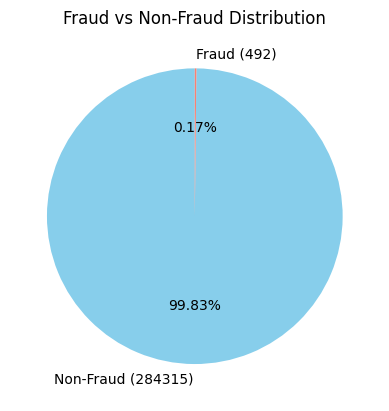

In [6]:
class_counts = df["Class"].value_counts()
label_map = {0: "Non-Fraud", 1: "Fraud"}
labels = [f"{label_map[cls]} ({class_counts[cls]})" for cls in class_counts.index]

# Pie chart
plt.pie(class_counts,labels=labels,autopct='%1.2f%%',startangle=90,colors=["skyblue", "salmon"])
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


In [7]:
degree_of_imbalance=df['Class'].value_counts()[0]/df['Class'].value_counts()[1]
print(degree_of_imbalance)

577.8760162601626


    Degree of imbalance is 578. Implies there is only 1 minority class sample for every 578 majority class samples

#### 2. Model Training

In [8]:
X=df.drop(['Class'],axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y) 
# stratify=y  ensures the test set retains its original imbalance

In [9]:
model_baseline=LogisticRegression(max_iter=300)
model_baseline.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


#### 3. Baseline Evaluation

In [10]:
y_pred=model_baseline.predict(X_test)
print(classification_report(y_test,y_pred))

precision_baseline=precision_score(y_test,y_pred)
recall_baseline=recall_score(y_test,y_pred)
f1_baseline=f1_score(y_test,y_pred)

print("Confusion Matrix \n ",confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix 
  [[56851    13]
 [   35    63]]


    Accuracy is misleading metric when output class is imbalanced. Because just the model predicting the majority class always will give you the accuracy score high which is equal to proportion of majority class. 
    
    So we are gonna use Precision, Recall and F1-score. Because they are gonna penalize the False positives, False Negatives and both respectively

### Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

### 1. Theoretical Foundation

    GMM vs. SMOTE: Key Difference

**SMOTE:**  
- Creates synthetic points by interpolating between minority samples and neighbors.  
- Works best in simple, linear regions.  
- Can fail with **non-linear, multi-modal, or disjoint** distributions, producing unrealistic samples.

**GMM-based Sampling:**  
- Models the minority class as a **mixture of Gaussians**, capturing multiple clusters and densities.  
- Generates new samples from the learned probability distribution.  
- Better at handling **complex shapes and sub-groups** in the feature space.

    Why GMM Can Be Theoretically Better
- **Multi-modality:** If the minority class consists of several distinct clusters, GMM can explicitly model these clusters, while SMOTE may blend them together unrealistically.
- **Density-awareness:** GMM respects the density of the data — more samples are generated in dense regions, fewer in sparse regions. SMOTE treats all regions equally.
- **Generative capability:** GMM provides a probabilistic model of the minority class, allowing controlled sampling that better matches the true underlying distribution.

#### 2.GMM Implementation

In [11]:
X_train_minority=X_train[y_train==1]
print("Number of Minority Samples: ",X_train_minority.shape[0])

Number of Minority Samples:  394


In [12]:
models=[GaussianMixture(n_components=k,random_state=42).fit(X_train_minority) for k in range(1,11)]
aic=[model.aic(X_train_minority) for model in models]
bic=[model.bic(X_train_minority) for model in models]

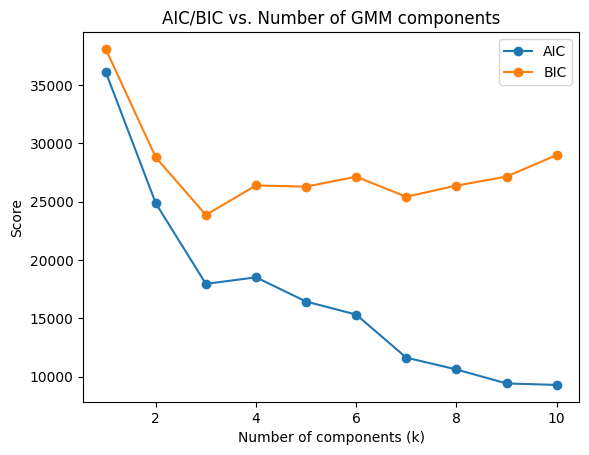

In [13]:
plt.plot(range(1,len(aic)+1), aic, label='AIC', marker='o')
plt.plot(range(1,len(bic)+1), bic, label='BIC', marker='o')
plt.xlabel('Number of components (k)')
plt.ylabel('Score')
plt.legend()
plt.title('AIC/BIC vs. Number of GMM components')
plt.show()

To fit the Gaussian Mixture Model (GMM) on the minority class, I evaluated different numbers of components 
k using the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Both AIC and BIC balance model fit with complexity, where lower values indicate a better tradeoff. AIC generally favors more complex models, while BIC penalizes additional parameters more strongly, often leading to a simpler and more generalizable choice. By fitting GMMs with varying
k and plotting AIC/BIC, we selected the value of 
k corresponding to the minimum BIC

    Since AIC and BIC are differ, BIC is usually preferred because it penalizes complexity more strongly, avoiding overfitting.

    So we are going with number of components(k)=3

#### 3.Synthetic Data Generation 

In [14]:
gmm_model=models[2]
labels=gmm_model.predict(X_train_minority)
pd.Series(labels).value_counts()

2    265
1     84
0     45
Name: count, dtype: int64

    Sampling from a GMM is a two-step process:

**1. Choose a component**

A GMM has k Gaussian components, each with its own mean, covariance, and weight.

The weights (π₁, π₂, …, πₖ) sum to 1 and represent the probability of choosing each component.

For example, if π₁ = 0.7 and π₂ = 0.3, then component 1 is chosen 70% of the time and component 2, 30%.

**2. Draw a sample from the chosen Gaussian**

After selecting a component, generate a sample from its Gaussian distribution defined by its mean and covariance.

In [15]:
n_majority = (y_train == 0).sum() 
n_minority = X_train_minority.shape[0]
n_to_generate = n_majority - n_minority

# Generate synthetic samples
X_synthetic, _ = gmm_model.sample(n_to_generate)

# Create new balanced dataset
X_train_gmm = np.vstack([X_train, X_synthetic])
y_train_gmm = np.hstack([y_train, np.full(n_to_generate,1)])

#### 4. Rebalancing with CBU

In [16]:
X_train_majority=X_train[y_train==0]
y_train_majority=y_train[y_train==0]

In [17]:
scores=[]
kmeans=[]
for k in range(1,20):
    kmeans.append(KMeans(k,random_state=42))
    labels=kmeans[k-1].fit_predict(X=X_train_majority)
    scores.append(kmeans[k-1].score(X_train_majority)*-1)

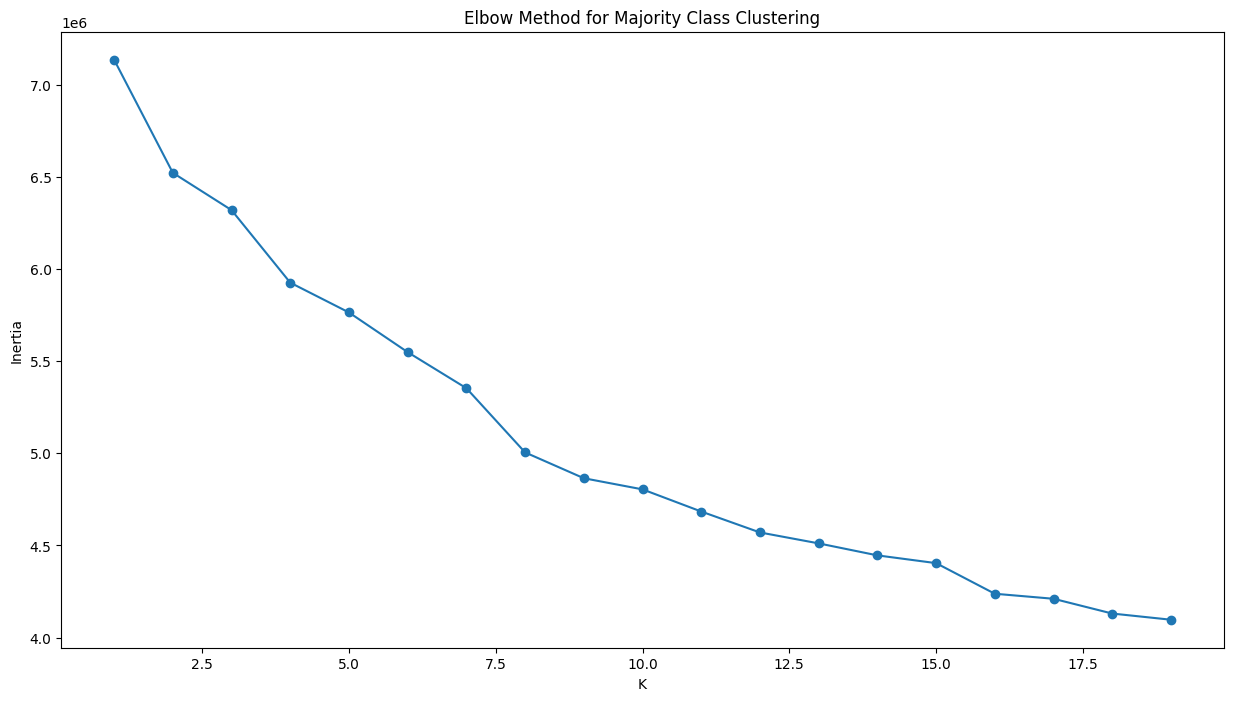

In [18]:
plt.figure(figsize=(15,8))
plt.plot([i for i in range(1,20)],scores,marker='o')
plt.title("Elbow Method for Majority Class Clustering")
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [19]:
kmeans_optimal=kmeans[7]
cluster_labels=kmeans_optimal.fit_predict(X_train_majority) #cluster labels
pd.Series(cluster_labels).value_counts()

6    58413
4    51879
1    48090
5    46381
2    13329
3     4626
7     3129
0     1604
Name: count, dtype: int64

In [20]:
print(X_train_majority.shape[0])

227451


In [21]:
clustercentroids=ClusterCentroids(estimator=kmeans_optimal,sampling_strategy={0: 1000},random_state=42)
X_train_cbu,y_train_cbu=clustercentroids.fit_resample(X_train,y_train)  

In [22]:
y_train_cbu.value_counts()

Class
0    1000
1     394
Name: count, dtype: int64

In [23]:
n_majority = (y_train_cbu == 0).sum() 
n_minority = sum(y_train_cbu==1)
n_to_generate = n_majority - n_minority

# Generate synthetic samples
X_synthetic, _ = gmm_model.sample(n_to_generate)

# Create new balanced dataset
X_train_gmm_cbu = np.vstack([X_train_cbu, X_synthetic])
y_train_gmm_cbu = np.hstack([y_train_cbu, np.full(n_to_generate,1)])

In [24]:
pd.Series(y_train_gmm_cbu).value_counts()

0    1000
1    1000
Name: count, dtype: int64

### Part C:  Performance Evaluation and Conclusion

#### 1. Model Training and Evaluation

In [25]:
model_gmm=LogisticRegression(random_state=42)
model_gmm_cbu=LogisticRegression(random_state=42)

model_gmm.fit(X_train_gmm,y_train_gmm)
model_gmm_cbu.fit(X_train_gmm_cbu,y_train_gmm_cbu)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred=model_gmm.predict(X_test.values)
precision_gmm=precision_score(y_test,y_pred)
recall_gmm=recall_score(y_test,y_pred)
f1_score_gmm=f1_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print("Confusion Matrix \n ",confusion_matrix(y_test,y_pred))
print(f" GMM oversampling \n Precision: {precision_gmm}, Recall: {recall_gmm}, f1_score: {f1_score_gmm}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix 
  [[55880   984]
 [    9    89]]
 GMM oversampling 
 Precision: 0.08294501397949673, Recall: 0.9081632653061225, f1_score: 0.1520068317677199


In [27]:
y_pred=model_gmm_cbu.predict(X_test.values)
precision_gmm_cbu=precision_score(y_test,y_pred)
recall_gmm_cbu=recall_score(y_test,y_pred)
f1_score_gmm_cbu=f1_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print("Confusion Matrix \n ",confusion_matrix(y_test,y_pred))
print(f" GMM oversampling after cluster based undersampling of majority class to certain population \n Precision: {precision_gmm_cbu}, Recall: {recall_gmm_cbu}, f1_score: {f1_score_gmm_cbu}")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.89      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix 
  [[54585  2279]
 [   11    87]]
 GMM oversampling after cluster based undersampling of majority class to certain population 
 Precision: 0.036770921386306, Recall: 0.8877551020408163, f1_score: 0.07061688311688312


#### 2. Comparative Analysis

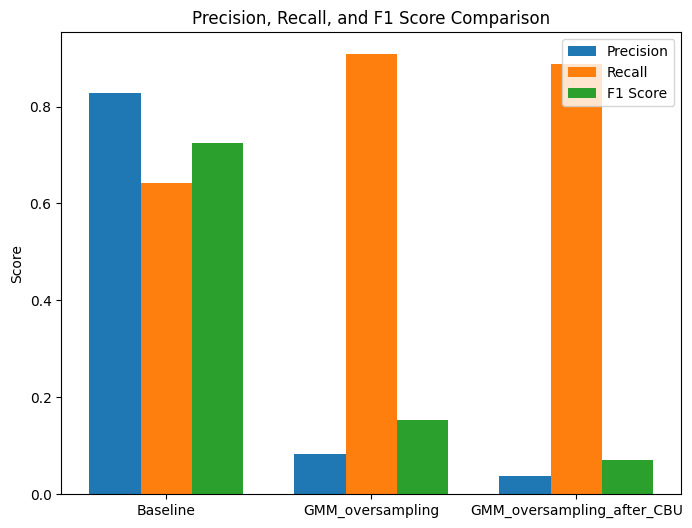

In [28]:
models = ["Baseline", "GMM_oversampling", "GMM_oversampling_after_CBU"]
precision = [precision_baseline, precision_gmm, precision_gmm_cbu]
recall    = [recall_baseline, recall_gmm, recall_gmm_cbu]
f1_score  = [f1_baseline, f1_score_gmm, f1_score_gmm_cbu]

x = np.arange(len(models))
width = 0.25  # bar width

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x - width, precision, width, label="Precision")
plt.bar(x, recall, width, label="Recall")
plt.bar(x + width, f1_score, width, label="F1 Score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score Comparison")
plt.legend()

plt.show()


    Comparative Analysis
The performance of the three models—Baseline, GMM Oversampling, and the hybrid GMM Oversampling with Cluster-Based Undersampling (CBU)—was evaluated on the original, imbalanced test set. The focus was on Precision, Recall, and F1-score for the minority (fraud) class, as these metrics provide a more nuanced view of performance than accuracy in an imbalanced scenario.

Discussion of Impact

**1.Baseline Model:** The baseline model, trained on the original imbalanced data, achieved a high precision (0.83) but a moderate recall (0.64). This means that while it was correct most of the time when it flagged a transaction as fraudulent, it failed to identify about 36% of the actual fraud cases. Its F1-score of 0.72 reflects a reasonable, albeit imperfect, balance.

**2.GMM Oversampling:** After balancing the training data by generating synthetic fraud samples with GMM, the model's behavior changed dramatically. The recall surged to 0.91, indicating the model became excellent at catching fraudulent transactions. However, this came at a massive cost to precision, which plummeted to just 0.08. This implies the model generated an extremely high number of false positives, flagging many legitimate transactions as fraudulent. The resulting F1-score of 0.15 shows a significant decline in overall performance.

**3.GMM Oversampling + CBU:** The hybrid approach, which first undersampled the majority class using clustering before applying GMM oversampling, performed the worst. While it maintained a high recall (0.89), its precision was a mere 0.04, leading to an F1-score of 0.07. This suggests that the initial undersampling step might have removed critical information from the majority class, making it even harder for the classifier to distinguish between the two classes accurately.

#### 3. Final Recommendation 

    Final Recommendation

**For Maximum Fraud Detection (Highest Recall):** The GMM Oversampling model is the best choice, as it caught the highest percentage of fraud (91% recall). Be prepared for a very high number of false alarms.

**For High Fraud Detection with a Smaller Dataset:** The GMM + CBU model is also a reasonable option. It maintained a very high recall (89%) while reducing the size of the majority class, which can be useful for faster training.

**For a Balanced Approach (Best F1-Score):** The Baseline model is the most practical choice if you need a balance between finding fraud and avoiding false positives. It has the best overall performance with the highest F1-Score (0.72) and precision (0.83)